In [1]:
import n2

import numpy
import astroquery.skyview
from astropy.units import deg
from astropy.units import arcmin
from astropy.units import km
from astropy.units import s

%matplotlib inline
import matplotlib.pyplot

[16:57:18,712] INFO: python 3.6.5
[16:57:18,713] INFO: n2-tools 0.0.7


In [2]:
# using FUGIN data
# see https://nro-fugin.github.io/
#  ! caution !  file size is too large 1.24 GB
d = n2.open_fits('http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036')

[16:57:19,044] INFO: (open_fits) path=http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036, hdu_num=0


In [3]:
d.info()

OBS : NRO45m / FOREST
LINE : 12CO1-0 (K)
HPBW : 20.2 x 20.2 arcsec

size : 1.3 GB
BITPIX : -32

Center : 14.999 deg  0.001 deg  50475.000 m / s
Width : 2.002 deg  2.002 deg  300300.000 m / s

Number of WCS axes: 3
CTYPE : 'GLON-SFL'  'GLAT-SFL'  'VRAD'  
CRVAL : 15.0  0.0  -99675.0  
CRPIX : 424.5  424.5  1.0  
NAXIS : 848  848  462


In [4]:
d2 = d.cut_world(x=(15.4*deg, 14.8*deg), y=(-0.9*deg, -0.4*deg), z=(0*km/s, 30*km/s))

[16:57:19,193] INFO: (cache.open) .n2cache/b6ceaf4bb0a79c583fd4101032067838faca9c14


In [5]:
d2.info()

OBS : NRO45m / FOREST
LINE : 12CO1-0 (K)
HPBW : 20.2 x 20.2 arcsec

size : 9.9 MB
BITPIX : -32

Center : 15.100 deg  -0.650 deg  14725.000 m / s
Width : 0.600 deg  0.501 deg  29900.000 m / s

Number of WCS axes: 3
CTYPE : 'GLON-SFL'  'GLAT-SFL'  'VRAD'  
CRVAL : 15.0  0.0  -99675.0  
CRPIX : 170.5  382.5  -152.0  
NAXIS : 254  212  46


In [6]:
img = n2.jpy_red_blue_image(d2.data, d2.data)
img

NameError: name 'r' is not defined

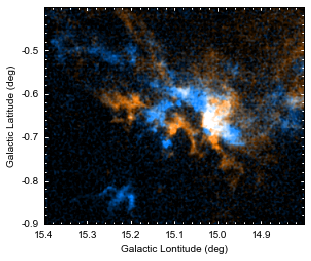

In [11]:
matplotlib.rcParams['xtick.color'] = 'w'
matplotlib.rcParams['ytick.color'] = 'w'

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection=r.wcs)
ax.imshow(img.get_image())
ax.set_xlim(0, r.data.shape[1])
ax.set_ylim(0, r.data.shape[0])
ax.coords[0].set_axislabel('Galactic Lontitude (deg)')
ax.coords[0].set_major_formatter('d.d')
ax.coords[0].set_ticks(spacing=0.1*deg)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].set_axislabel('Galactic Latitude (deg)')
ax.coords[1].set_major_formatter('d.d')
ax.coords[1].set_ticks(spacing=0.1*deg)
ax.coords[1].display_minor_ticks(True)
fig.savefig('ccc-red-blue-image.jpg', dpi=50)